In [20]:
import pickle
from models.neural_network import CustomizedNeuralNetwork


with open("saved_models/networks/autoencoder_best", "rb") as pickle_file:
    fashion_autoencoder = pickle.load(pickle_file)

fashion_autoencoder

In [29]:
from dataset.dataset import load_fashion_mnist_dataset

_, X_test = load_fashion_mnist_dataset()

X_test[1].shape

(784,)

In [22]:
fashion_autoencoder: CustomizedNeuralNetwork

points = fashion_autoencoder.forward(X_test[1])

points = points.reshape(28, 28)

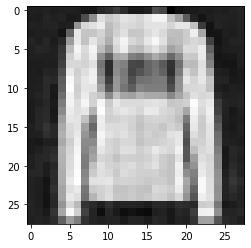

In [23]:
from matplotlib import pyplot as plt

plt.imshow(points, interpolation="nearest")
plt.show()

In [24]:
from numpy.typing import NDArray


def deflatten(ndarray: NDArray):
    return ndarray.reshape(28, 28)


def reconstruct_image(image: NDArray):
    reconstructed = fashion_autoencoder.forward(image)

    return deflatten(reconstructed)

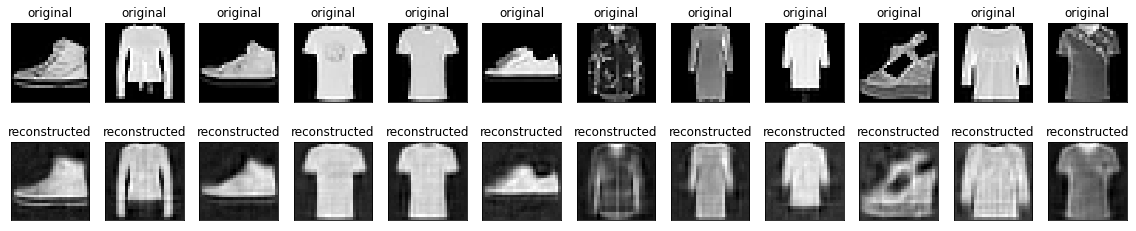

In [32]:
from numpy import random

n = 12

plt.figure(figsize=(20, 4))
for i in range(n):
    random_index = random.randint(0, X_test.shape[0])
    current_image = X_test[random_index]

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(deflatten(current_image), interpolation="nearest")
    plt.title("original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstruct_image(current_image), interpolation="nearest")
    plt.title("reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()